## Importing important packages

In [1]:
import requests, zipfile, io, gzip, glob, os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [24]:
# The station designation
sta="P395"
file_url="http://geodesy.unr.edu/gps_timeseries/tenv/IGS14/"+ sta + ".tenv"
r = requests.get(file_url).text.splitlines()  # download, read text, split lines into a list
ue=[];un=[];uv=[];se=[];sn=[];sv=[];date=[];date_year=[];df=[]
for iday in r:  # this loops through the days of data
    crap=iday.split()
    if len(crap)<10:
      continue
    date.append((crap[1]))
    date_year.append(float(crap[2]))
    ue.append(float(crap[7])*1000)
    un.append(float(crap[8])*1000)
    uv.append(float(crap[9])*1000)
#             # errors
    se.append(float(crap[10])*1000)
    sn.append(float(crap[11])*1000)
    sv.append(float(crap[12])*1000)

In [25]:
# We now make a data frame
crap={'station':sta,'date':date,'date_year':date_year,'east':ue,'north':un,'up':uv}
if len(df)==0:
    df = pd.DataFrame(crap, columns = ['station', 'date','date_year','east','north','up'])
else:
    df=pd.concat([df,pd.DataFrame(crap, columns = ['station', 'date','date_year','east','north','up'])])
df.describe()

,date_year,east,north,up
count,6407.000000,6.407000e+03,6.407000e+03,6407.000000
mean,2014.866176,3.347626e+06,4.987420e+09,53038.716661
std,5.090887,3.288936e+01,1.770970e+01,5.622003
min,2006.067100,3.347564e+06,4.987420e+09,52997.270000
25%,2010.468150,3.347598e+06,4.987420e+09,53034.980000
50%,2014.855600,3.347629e+06,4.987420e+09,53038.540000
75%,2019.262150,3.347654e+06,4.987420e+09,53042.310000
max,2024.024600,3.347683e+06,4.987420e+09,53065.440000


Text(0.5, 0, 'Time (years)')

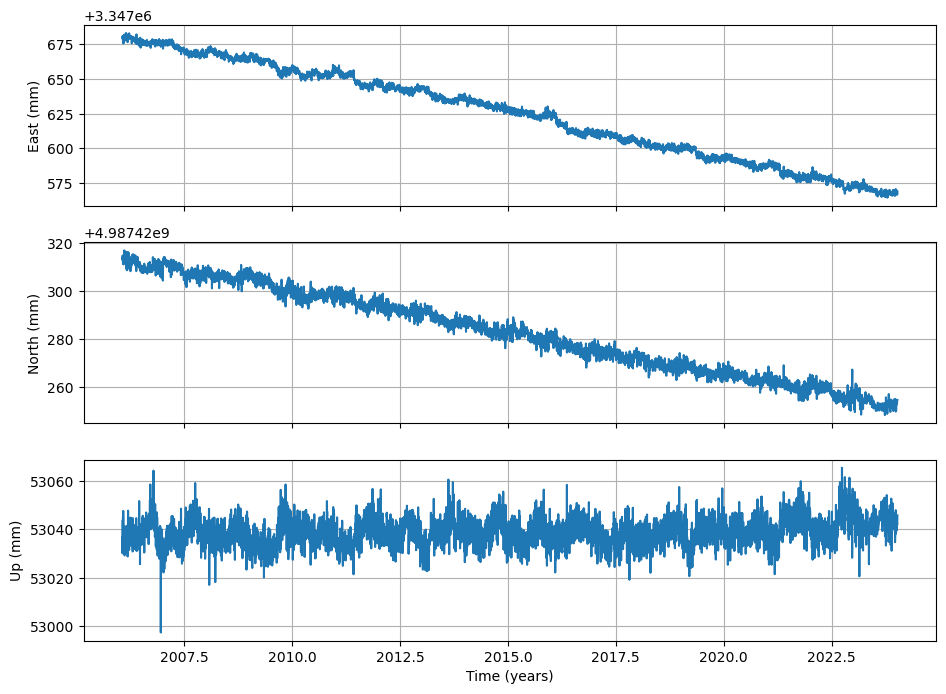

In [26]:
# Plot the GPS time series
fig,ax=plt.subplots(3,1,figsize=(11,8),sharex=True)
ax[0].plot(df['date_year'][df['station']==sta],df['east'][df['station']==sta]);ax[0].grid(True);ax[0].set_ylabel('East (mm)')
ax[1].plot(df['date_year'][df['station']==sta],df['north'][df['station']==sta]);ax[1].grid(True);ax[1].set_ylabel('North (mm)')
ax[2].plot(df['date_year'][df['station']==sta],df['up'][df['station']==sta]);ax[2].grid(True);ax[2].set_ylabel('Up (mm)')
ax[2].set_xlabel('Time (years)')

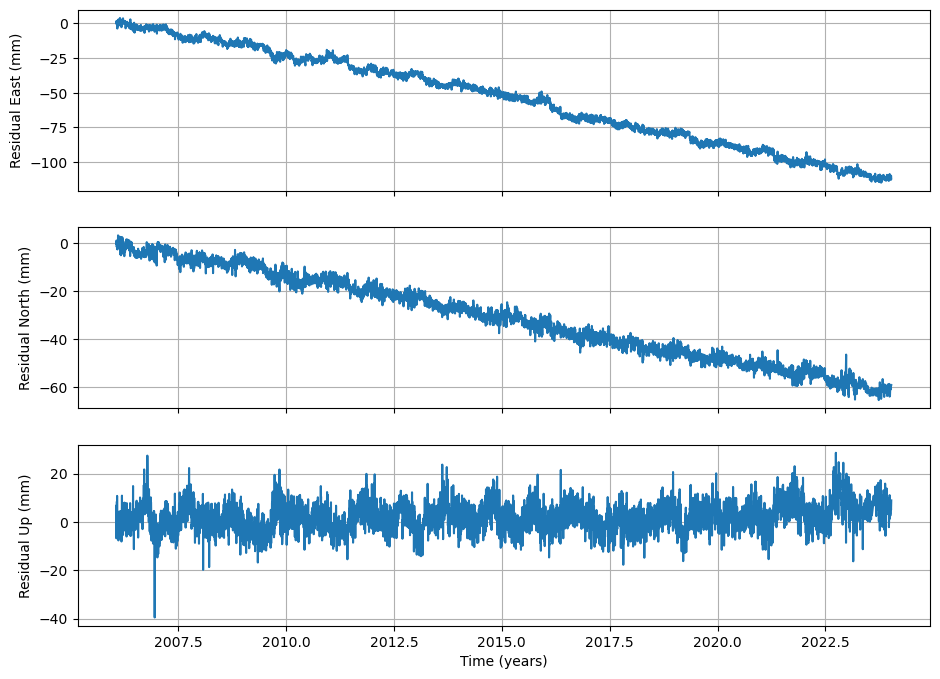

In [27]:
# Calculate residuals
residuals_east = df['east'] - df['east'].iloc[0]
residuals_north = df['north'] - df['north'].iloc[0]
residuals_up = df['up'] - df['up'].iloc[0]

# Plot the GPS residuals
fig, ax = plt.subplots(3, 1, figsize=(11, 8), sharex=True)
ax[0].plot(df['date_year'][df['station'] == sta], residuals_east[df['station'] == sta])
ax[0].grid(True)
ax[0].set_ylabel('Residual East (mm)')

ax[1].plot(df['date_year'][df['station'] == sta], residuals_north[df['station'] == sta])
ax[1].grid(True)
ax[1].set_ylabel('Residual North (mm)')

ax[2].plot(df['date_year'][df['station'] == sta], residuals_up[df['station'] == sta])
ax[2].grid(True)
ax[2].set_ylabel('Residual Up (mm)')
ax[2].set_xlabel('Time (years)')

plt.show()


In [33]:
residuals_north.describe()

count    6407.00000
mean      -30.40312
std        17.70970
min       -65.45000
25%       -46.30500
50%       -30.23000
75%       -15.06000
max         3.15000
Name: north, dtype: float64